# Task 1 : Predict Restaurant Ratings

<h3>Objective :</h3>

- Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

<h3>Steps :</h3>

- Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
- Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.
- Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.
- Interpret the model's results and analyze the most influential features affecting restaurant ratings.

## Import necessary Libraries and Data Loading

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Ignore warnings

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# Data Loading (CSV file)

dataset = pd.read_csv(r"E:\Cognify\Dataset .csv")
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Data Pre-processing

<h3>Missing Value Data Analysis</h3>

In [3]:
# Check columns of the dataframe

print(list(dataset.columns))

['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [4]:
# Check null count and data types

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# check total null values of the data

dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

    - In this dataset, 9 values ​​of the Cuisines were empty, which was removed.

In [6]:
# drop null values and restore in new dataframe

refine_data = dataset.dropna()
refine_data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
# verifying dropped data

refine_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## EDA - Exploratory Data Analysis

<h3>Statistical Data Analysis and Visual Data Analysis</h3>

In [8]:
# Descriptive Statistics

refine_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<h3>Conclusion of Descriptive Statistics</h3>

1. Average Cost for Two : 
- There's a high variance in average cost, a mix of both budget and luxury restaurants. 
- The extreme max value of two 800,000$ could be an outlier.

2. Price Range :
- Price range scale 1 to 4
- Most frequent either 1 or 2
- Most restaurants fall between low to mid-range pricing with few high-end options.

3. Aggregate Rating :
- The average rating is below 3, suggesting that many restaurants have moderate to poor ratings.
- The presence of ratings indicates mixed customer rating.

4. Votes : 
- Most restaurants have low customer review counts, but a few have high popularity (10,934 votes). 
- The high standard deviation suggests some restaurants get significantly more attention than others.

In [9]:
# Check Unique values

unique_dict = dict()
unique_count = dict()

# create a for loop to store unique values in dictionary
for i in list(refine_data.columns):
    unique_dict.update({i : refine_data[i].unique()})
    unique_count.update({i : len(refine_data[i].unique())})

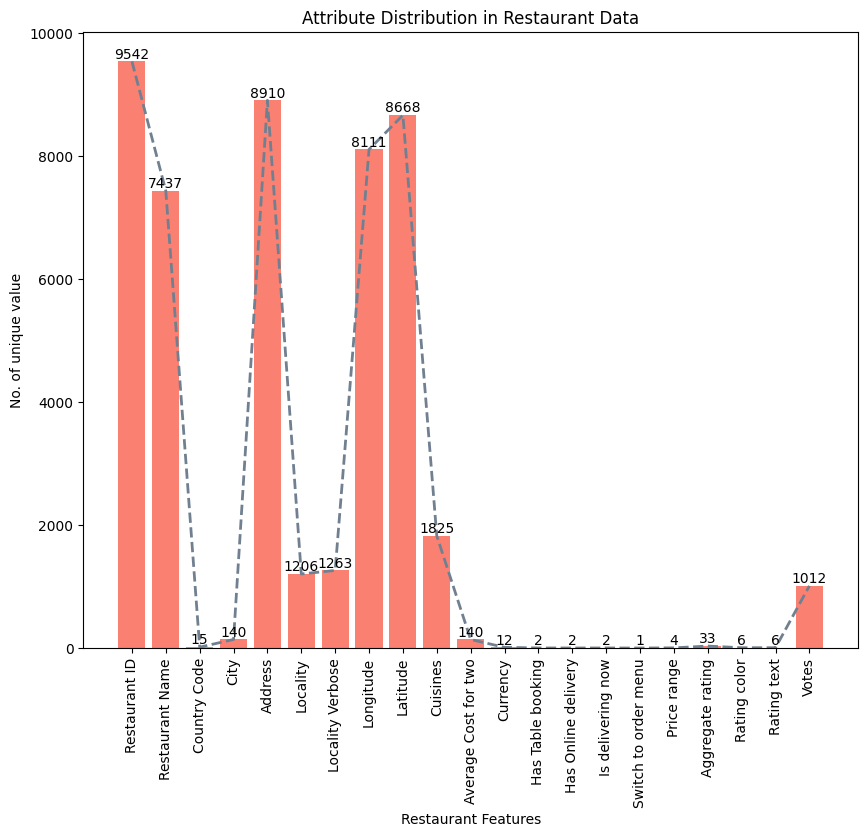

In [10]:
# Unique Value Counts Visual Analysis

plt.figure(figsize=(10,8))
plt.title(f"Attribute Distribution in Restaurant Data")
ax = plt.bar(unique_count.keys(), unique_count.values(), color = 'salmon')
plt.bar_label(ax,labels=unique_count.values())
plt.plot(list(unique_count.keys()), list(unique_count.values()), color = 'slategray', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel("Restaurant Features")
plt.ylabel("No. of unique value")
plt.show()

<h3>Graph Analysis Summary</h3>

- This bar chart visualizes the number of unique values for each feature in the restaurant dataset.

    - Restaurants span 15 different countries and cities with varity of cuisines.
    - Each restaurant has a unique identifier but some duplicates or chains.
    - Table Booking, Online Delivery indicate limited choices

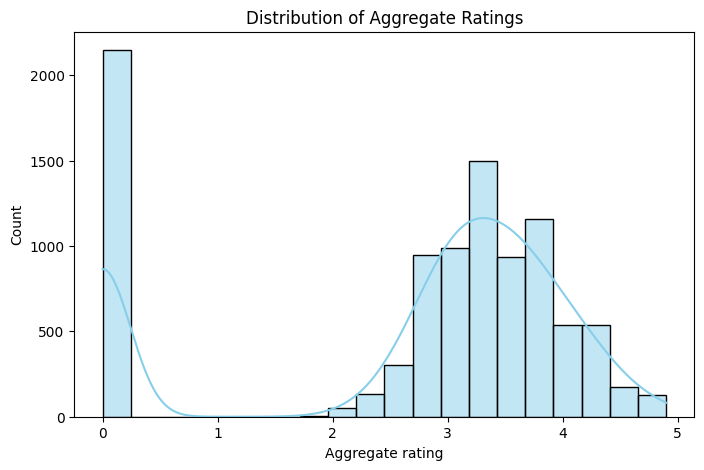

In [11]:
# Find outliers and view the data distribution using a histogram

plt.figure(figsize=(8, 5))
sns.histplot(refine_data["Aggregate rating"].astype(float), bins=20, kde=True, color="skyblue")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate rating")
plt.ylabel("Count")
plt.show()

<h3>Distribution Conclusion</h3>

- The distribution of ratings across restaurants.
- A large spike at rating 0, which might indicate restaurants that weren’t rated or had missing data.
- A right-skewed distribution: most ratings are clustered between 3.0 to 4.5.
- Very few restaurants have ratings below 2 or above 4.5.

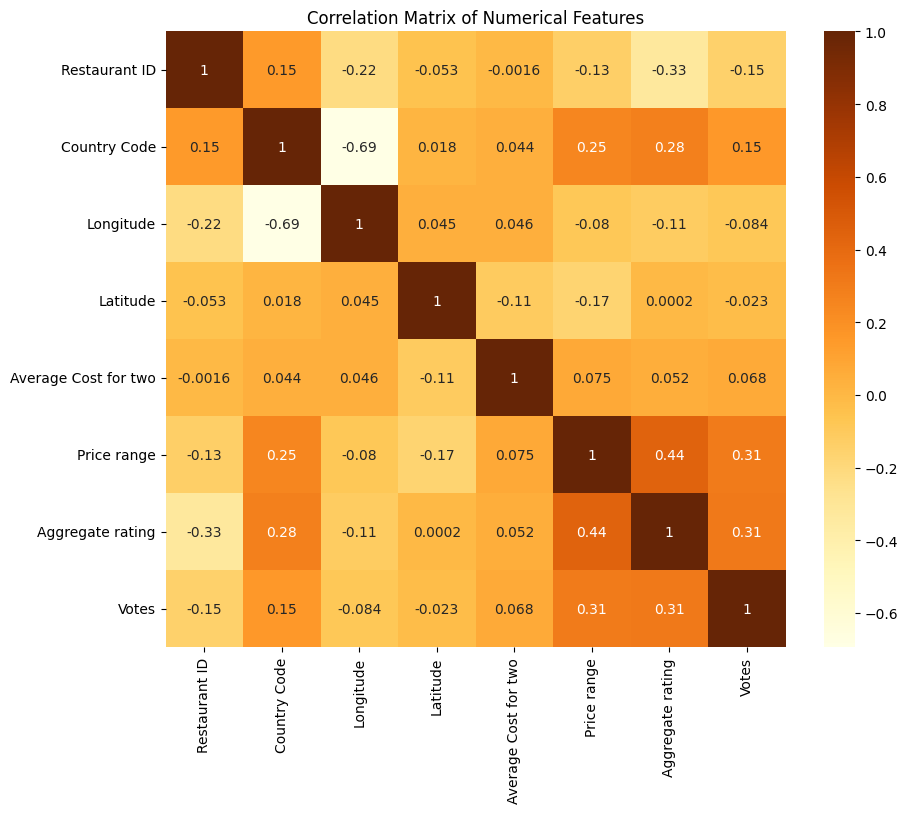

In [12]:
# Only Numeric value Correlation Analysis

plt.figure(figsize=(10,8))
sns.heatmap(refine_data.corr(numeric_only=True), annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<h3>Correlation Matrix Analysis Summary</h3>

- Correlation values range from -1 (strong negative) to +1 (strong positive).

- The heatmap visualizes the correlation between different numerical features in the restaurant dataset.
    
    - Price Range & Aggregate Rating (0.44) with strong positive relation have better ratings.
    - Price Range & Latitude (-0.17) with storng negative relation. Newer restaurants may struggle with lower ratings initially.

## Feature Engineering

<h3>Data Labeling using LabelEncoder and Mapping</h3>

In [13]:
le = LabelEncoder()

In [14]:
# create a new dataframe

label_data = refine_data[['Country Code', 'Price range', 'Aggregate rating', 'Votes']]
label_data.head()

,Country Code,Price range,Aggregate rating,Votes
0,162,3,4.8,314
1,162,3,4.5,591
2,162,4,4.4,270
3,162,4,4.9,365
4,162,4,4.8,229


In [15]:
# Mapping Dictionary

color_rate = {
    'Dark Green' : 5,
    'Green' : 4,
    'Yellow' : 3,
    'Orange' : 2,
    'White' : 1,
    'Red' : 0 
}

rate = {
    'Excellent' : 5,
    'Very Good' : 4,
    'Good' : 3,
    'Average' : 2,
    'Poor' : 1,
    'Not rated' : 0
}

In [16]:
# Labeling

label_data['Currency'] = le.fit_transform(refine_data['Currency'])
label_data['Has Online delivery'] = le.fit_transform(refine_data['Has Online delivery'])
label_data['Has Table booking'] = le.fit_transform(refine_data['Has Table booking'])
label_data['Is delivering now'] = le.fit_transform(refine_data['Is delivering now'])
label_data['Switch to order menu'] = le.fit_transform(refine_data['Switch to order menu'])

label_data['Rating color']  = refine_data['Rating color'].map(color_rate)
label_data['Rating text']  = refine_data['Rating text'].map(rate)

In [17]:
# Display updated datframe by Evaluate new features 

label_data.head(5)

,Country Code,Price range,Aggregate rating,Votes,Currency,Has Online delivery,Has Table booking,Is delivering now,Switch to order menu,Rating color,Rating text
0,162,3,4.8,314,0,0,1,0,0,5,5
1,162,3,4.5,591,0,0,1,0,0,5,5
2,162,4,4.4,270,0,0,1,0,0,4,4
3,162,4,4.9,365,0,0,0,0,0,5,5
4,162,4,4.8,229,0,0,1,0,0,5,5


<h3>Feature select using Correlation method</h3>

<Axes: xlabel='Aggregate rating', ylabel='Density'>

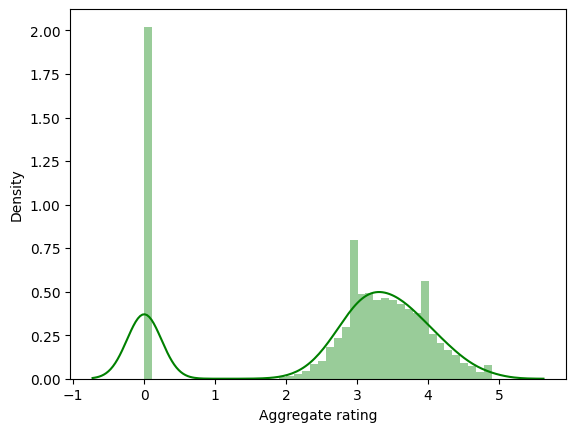

In [18]:
sns.distplot(label_data['Aggregate rating'], color='green')

In [19]:
# Correlation Analysis for feature selection

correlation_matrix = label_data.corr()
corr = correlation_matrix["Aggregate rating"].sort_values(ascending=False)

In [20]:
print(corr)

Aggregate rating        1.000000
Rating text             0.944439
Rating color            0.828382
Price range             0.438356
Votes                   0.313474
Country Code            0.281295
Has Online delivery     0.226250
Has Table booking       0.190351
Is delivering now       0.019231
Currency               -0.005337
Switch to order menu         NaN
Name: Aggregate rating, dtype: float64


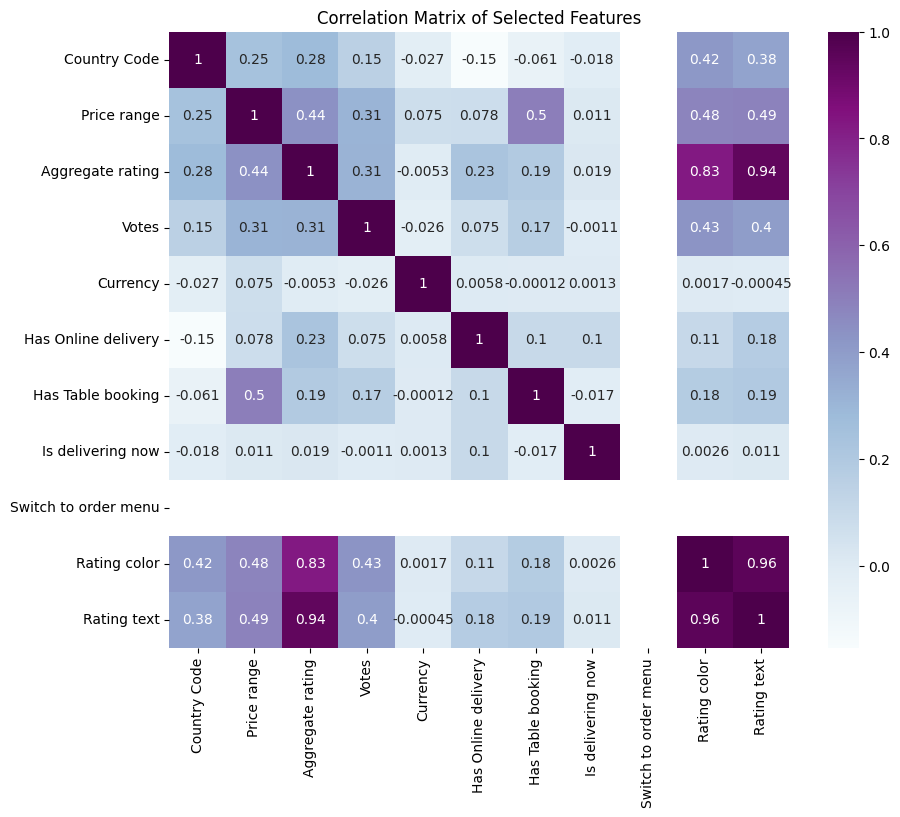

In [21]:
# Correlation Heat map Analysis

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'BuPu')
plt.title('Correlation Matrix of Selected Features')
plt.show()

<h3>Summary of Correlation Matrix (Feature Selection)</h3>

- This heatmap represents the correlation matrix of selected features, where correlation values range from -1 to 1.

    - Select features highly correlated with the target variable which is "Aggregate Rating".
        1. Rating text
        2. Rating color
        3. Price range

    - Weak relationships with target variables which is negligible for feature selection.
        1. Currency
        2. Has Online delivery
        3. Has Table booking
        4. Is delivering now

### Data Splitting

In [22]:
# Extract features and target - Aggregate rating for prediction

feature = label_data.drop(['Aggregate rating'], axis=1)
target = label_data["Aggregate rating"]

In [23]:
feature

,Country Code,Price range,Votes,Currency,Has Online delivery,Has Table booking,Is delivering now,Switch to order menu,Rating color,Rating text
0,162,3,314,0,0,1,0,0,5,5
1,162,3,591,0,0,1,0,0,5,5
2,162,4,270,0,0,1,0,0,4,4
3,162,4,365,0,0,0,0,0,5,5
4,162,4,229,0,0,1,0,0,5,5
...,...,...,...,...,...,...,...,...,...,...
9546,208,3,788,11,0,0,0,0,4,4
9547,208,3,1034,11,0,0,0,0,4,4
9548,208,4,661,11,0,0,0,0,3,3
9549,208,4,901,11,0,0,0,0,4,4


In [24]:
target

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [25]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, random_state = 42)

In [26]:
# Print shapes of the resulting datasets

print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (6679, 10)
x_test shape: (2863, 10)
y_train shape: (6679,)
y_test shape: (2863,)


### Regression Algorithm - Linear Regression

- Model training

In [27]:
# Initialize the linear regression model

model = LinearRegression()

In [28]:
# Train the model

model.fit(x_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the test set

y_pred = model.predict(x_test)
y_pred

array([0.09757137, 4.41537591, 2.88781769, ..., 4.40432116, 3.38908021,
       0.09773686])

In [30]:
# Print the predictions and error for verification

pred_df = pd.DataFrame(
    {'Actual Aggregate rating' : y_test,
     'Predicated Aggregate rating' : y_pred,
     'Residuals = Actual - Predicated' : y_test-y_pred}
)

pred_df.head(10)

,Actual Aggregate rating,Predicated Aggregate rating,Residuals = Actual - Predicated
7142,0.0,0.097571,-0.097571
1860,4.1,4.415376,-0.315376
4425,3.3,2.887818,0.412182
3219,3.9,3.639863,0.260137
8308,0.0,0.097737,-0.097737
5263,2.9,2.915025,-0.015025
6095,0.0,0.082545,-0.082545
2296,4.3,4.408641,-0.108641
2780,3.5,3.629967,-0.129967
8769,0.0,0.097737,-0.097737


- Model evaluation

    - Evaluate the performance of the trained linear regression model using R-squared, MSE, RMSE, and MAE.

In [31]:
# Calculate evaluation metrics

print(f"R-squared : {r2_score(y_test, y_pred)}\nMean Squared Error : {mean_squared_error(y_test, y_pred)}\nMean Absolute Error : {mean_absolute_error(y_test, y_pred)}\nRoot Mean Squared Error : {mean_squared_error(y_test, y_pred,squared=False)}")

R-squared : 0.9655052769354107
Mean Squared Error : 0.07897860753211162
Mean Absolute Error : 0.20650502088731748
Root Mean Squared Error : 0.281031328381929


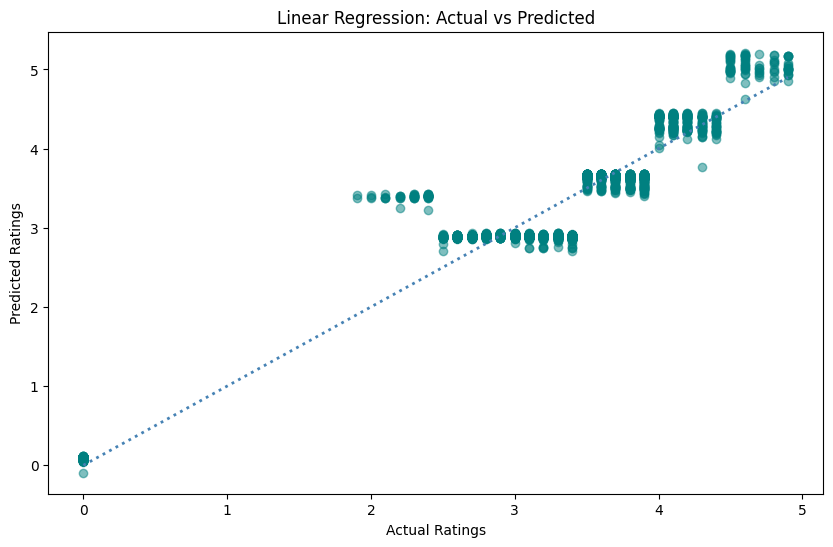

In [32]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred, alpha=0.5, color = "teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'steelblue', lw=2, linestyle="dotted")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

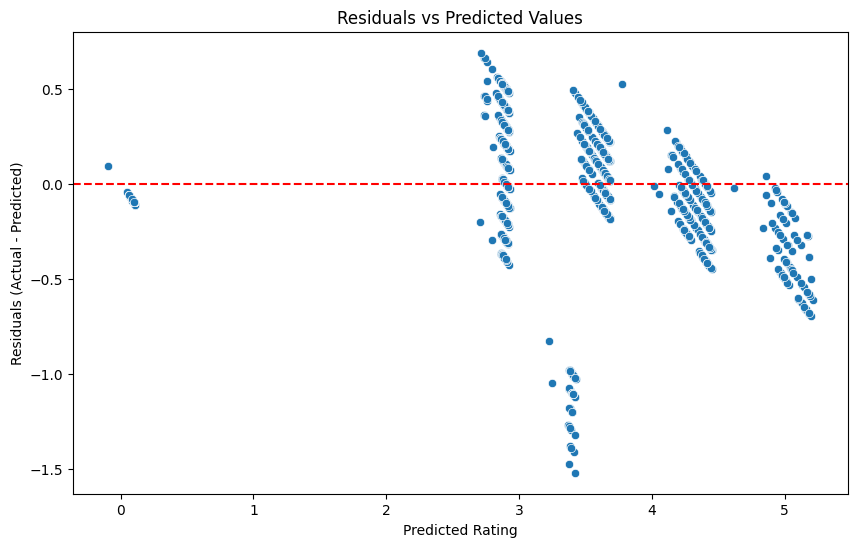

In [33]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=pred_df['Predicated Aggregate rating'], y=pred_df['Residuals = Actual - Predicated'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Rating")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()

<h3>Linear Regression Model Performance</h3>

- High R² (96.5%) indicates the model is well-fitted.

- Low MSE, MAE, and RMSE confirm the model makes small prediction errors.
- Overall, Linear regression model is highly effective in predicting restaurant ratings.
- It predicted fairly accurately but struggled with extreme or zero ratings.

### Regression Algorithm - Decision tree

- Model training

In [34]:
# Initialize the Decision tree regression model

tree_model = DecisionTreeRegressor()

In [35]:
# Train the model

tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
# Make predictions on the test set

ytree_pred = tree_model.predict(x_test)
ytree_pred

array([0. , 4.1, 3. , ..., 4. , 2.4, 0. ])

In [37]:
# Print the predictions and error for verification

tree_pred_df = pd.DataFrame(
    {'Actual Aggregate rating' : y_test,
     'Predicated Aggregate rating' : ytree_pred,
     'Residuals = Actual - Predicated' : y_test-ytree_pred}
)

tree_pred_df

,Actual Aggregate rating,Predicated Aggregate rating,Residuals = Actual - Predicated
7142,0.0,0.0,0.0
1860,4.1,4.1,0.0
4425,3.3,3.0,0.3
3219,3.9,3.7,0.2
8308,0.0,0.0,0.0
...,...,...,...
5608,0.0,0.0,0.0
5386,0.0,0.0,0.0
1867,4.3,4.0,0.3
9105,2.0,2.4,-0.4


- Model evaluation

    - Evaluate the performance of the trained Decision Tree regression model using R-squared, MSE, RMSE, and MAE.

In [38]:
# Calculate evaluation metrics

print(f"R-squared : {r2_score(y_test, ytree_pred)}\nMean Squared Error : {mean_squared_error(y_test, ytree_pred)}\nMean Absolute Error : {mean_absolute_error(y_test, ytree_pred)}\nRoot Mean Squared Error : {mean_squared_error(y_test, ytree_pred,squared=False)}")

R-squared : 0.979535061419508
Mean Squared Error : 0.04685622056715844
Mean Absolute Error : 0.14298717313169856
Root Mean Squared Error : 0.216462977359082


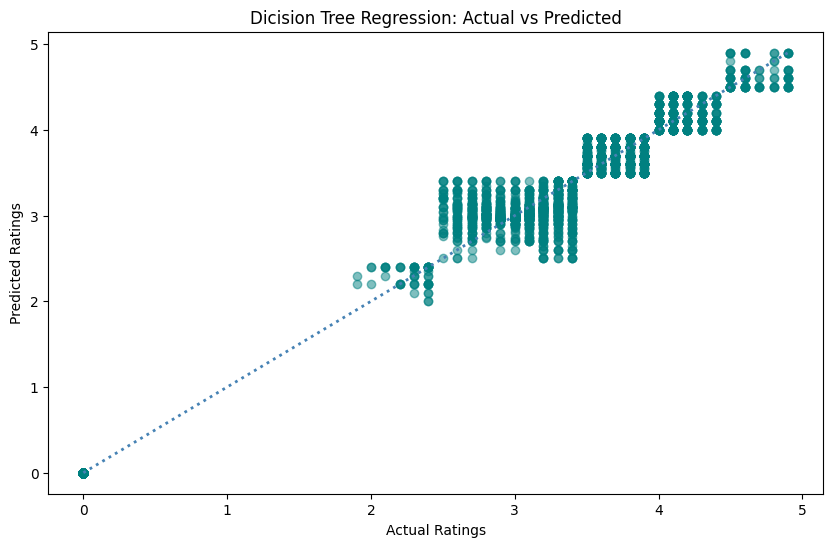

In [39]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, ytree_pred, alpha=0.5, color = "teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'steelblue', lw=2, linestyle="dotted")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Dicision Tree Regression: Actual vs Predicted")
plt.show()

<h3>Decision Tree Regression Model Performance</h3>

- High R² (97.9%) indicates the model is well-fitted.

- Low MSE, MAE, and RMSE confirm the model makes small prediction errors.
- Overall, Decision Tree regression model is highly effective in predicting restaurant ratings.

## Model Evaluation and Comparison

- Comparison between two Regression model

In [40]:
# new dataframe to visual a difference between both regression model

comparison_df = pd.DataFrame(
    {'Actual Aggregate rating' : y_test,
     'Predicated Aggregate rating (Linear Regression)' : y_pred,
     'Predicated Aggregate rating (Decision Tree Regression)' : ytree_pred}
)

comparison_df.head(10)

,Actual Aggregate rating,Predicated Aggregate rating (Linear Regression),Predicated Aggregate rating (Decision Tree Regression)
7142,0.0,0.097571,0.000000
1860,4.1,4.415376,4.100000
4425,3.3,2.887818,3.000000
3219,3.9,3.639863,3.700000
8308,0.0,0.097737,0.000000
5263,2.9,2.915025,2.947436
6095,0.0,0.082545,0.000000
2296,4.3,4.408641,4.100000
2780,3.5,3.629967,3.500000
8769,0.0,0.097737,0.000000


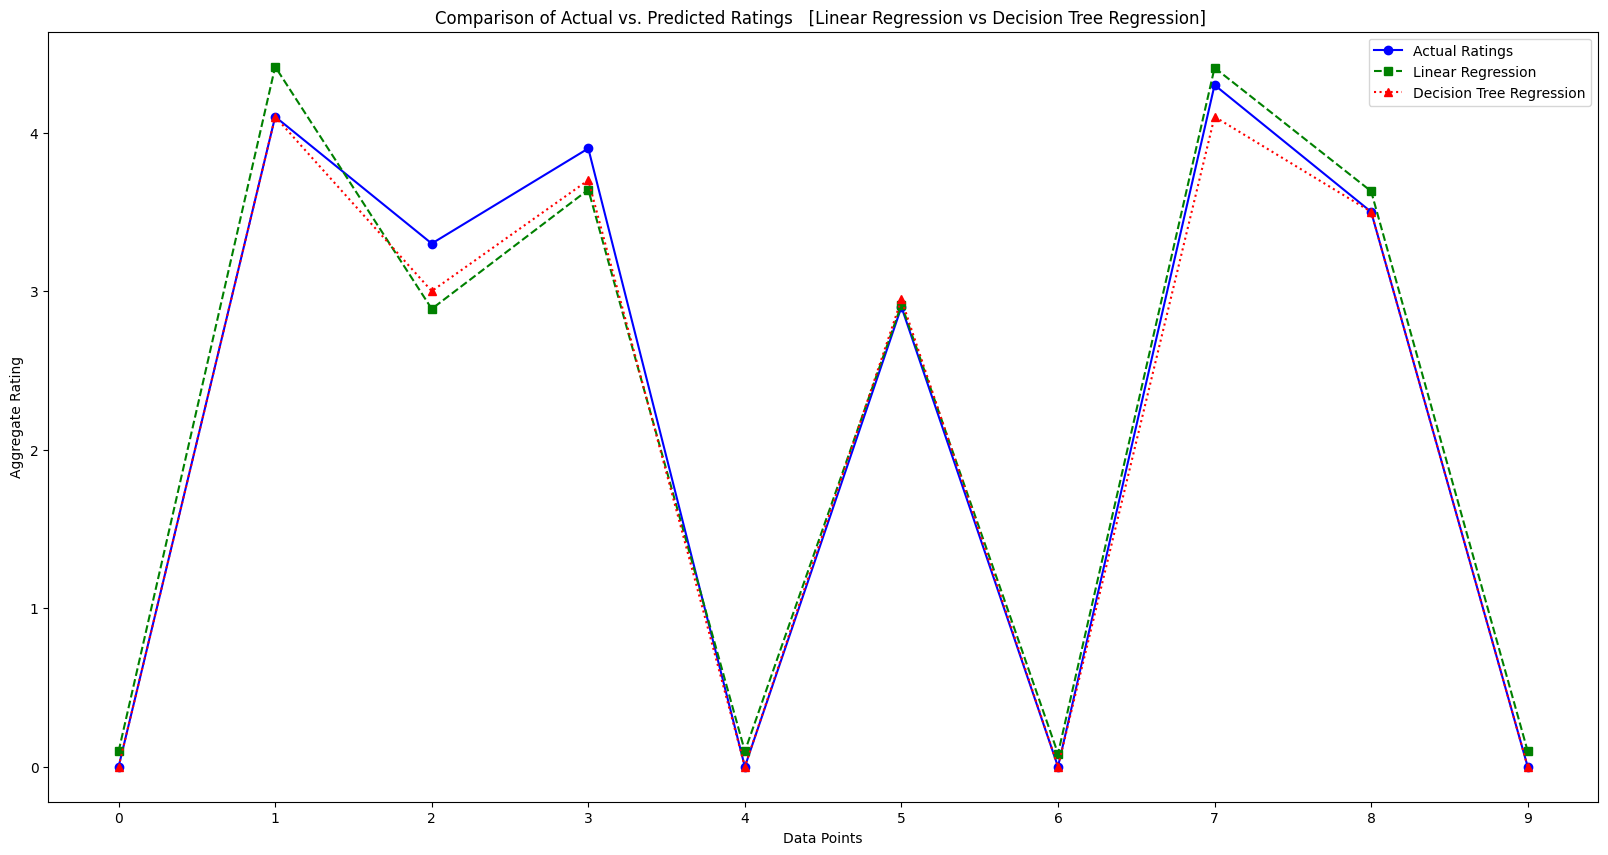

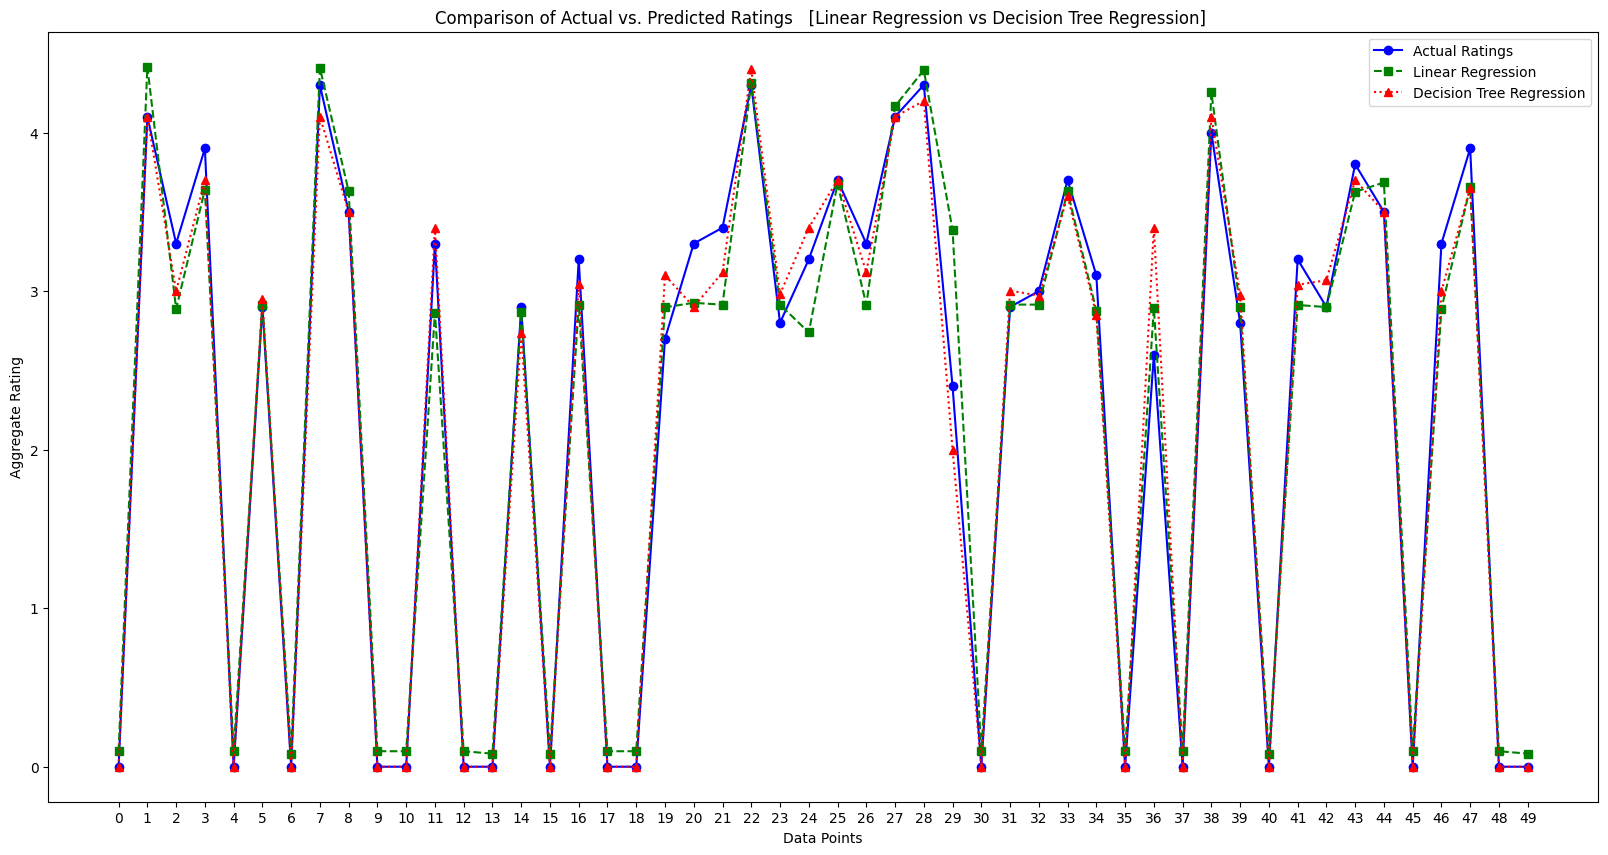

In [41]:
# Plot the data with 10 data points
plt.figure(figsize=(20, 10))

# x-axis labels
indices = np.arange(len(comparison_df['Actual Aggregate rating'].head(10)))

plt.plot(indices, comparison_df['Actual Aggregate rating'].head(10), marker='o', linestyle='-', label="Actual Ratings", color='blue')
plt.plot(indices, comparison_df['Predicated Aggregate rating (Linear Regression)'].head(10), marker='s', linestyle='--', label="Linear Regression", color='green')
plt.plot(indices, comparison_df['Predicated Aggregate rating (Decision Tree Regression)'].head(10), marker='^', linestyle=':', label="Decision Tree Regression", color='red')

# Labels and title
plt.xlabel("Data Points")
plt.ylabel("Aggregate Rating")
plt.title("Comparison of Actual vs. Predicted Ratings   [Linear Regression vs Decision Tree Regression] ")
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()



# Plot the data with 50 data points
plt.figure(figsize=(20, 10))

# x-axis labels
indices = np.arange(len(comparison_df['Actual Aggregate rating'].head(50)))

plt.plot(indices, comparison_df['Actual Aggregate rating'].head(50), marker='o', linestyle='-', label="Actual Ratings", color='blue')
plt.plot(indices, comparison_df['Predicated Aggregate rating (Linear Regression)'].head(50), marker='s', linestyle='--', label="Linear Regression", color='green')
plt.plot(indices, comparison_df['Predicated Aggregate rating (Decision Tree Regression)'].head(50), marker='^', linestyle=':', label="Decision Tree Regression", color='red')

# Labels and title
plt.xlabel("Data Points")
plt.ylabel("Aggregate Rating")
plt.title("Comparison of Actual vs. Predicted Ratings   [Linear Regression vs Decision Tree Regression] ")
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()

<h3>Summary of Comparison of Predicted vs. Actual Aggregate Ratings</h3>

- Based on the analysis,

    This table compares the Actual Aggregate Rating with the predicted values from two regression models:

    1. Linear Regression
    2. Decision Tree Regression

    - Instances where both models perform well:

        E.g., Actual = 4.1, 
            
            Predictions:
            Linear Regression: 4.415
            Decision Tree Regression: 4.1

        Actually, Decision Tree Regression is close to actual.

    - Instances where Linear Regression underperforms:

        E.g., Actual = 0.0, 
        
            Predictions:
            Linear Regression: 0.097
            Decision Tree Regression: 0.0

        Actually, Decision tree Regression is the perfect match with actual.

- Overall, Decision Tree Regression is more effective for capturing discrete rating values specially for 0 ratings.

- Linear Regression provides smoother estimates but struggles with outlier values.
- The dataset size is small, so the results might not be generalizable to larger datasets.